In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


class Perceptron():
    def __init__(self, squash):
        self.w = None
        self.b = 0.0
        self.errors = 0
        self.s = squash

        
    def predict(self, X):
        return self.s(X.dot(self.w) + self.b)

    
    def fit(self, X, y, epochs=100):
        n = X.shape[1]
        self.w = np.random.rand(n)
        error = 0

        for _ in range(epochs):
            for x_i, y_i in zip(X, y):

                error = y_i - self.predict(x_i.reshape((1, -1)))

                if error != 0:
                    self.w += error * x_i
                    self.b += error

            self.errors += abs(y - self.predict(X)).sum()

            if self.errors == 0:
                break

        return self

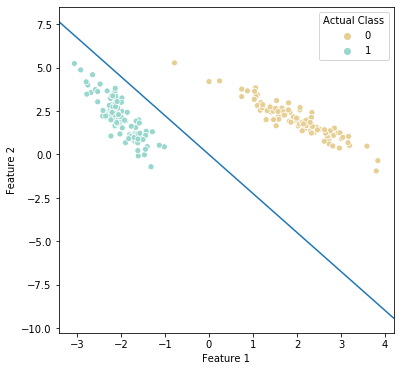

In [9]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    flip_y=0,
    class_sep=2
)

sq_f = lambda x: np.heaviside(x, 1).astype(np.int)

model = Perceptron(sq_f)
model.fit(X, y)

ax = plt.subplots(1, 1, figsize=(6, 6))    
ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="BrBG")
    
x = np.linspace(*ax.get_xlim())
hyperplane = -(model.w[0] * x + model.b)/model.w[1]

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
sns.lineplot(x=x, y=hyperplane, ax=ax, palette="BrBG")
ax.set_xlim(x.min(), x.max())
ax.legend(title='Actual Class')
plt.show()


In [4]:
np.zeros((2, ))

array([0., 0.])

In [6]:
np.random.rand(n)

array([0.70609297, 0.51957501])